<a href="https://colab.research.google.com/github/jose-cisco/Fake-News-Detection-Using-Logistic-Regession-And-DecisionTree-Classifier/blob/main/certificate_decision_tree_cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# งานเพื่อวัดผลการเรียนรู้ของผู้เข้าอบรม
Cat and Dog

เพื่อให้เกิดความง่ายในการทำความเข้าใจ **ผมจะขอเรียก DataFrame ว่าตาราง (Table)**

In [1]:
import pandas as pd

# สร้างตารางที่จัดเก็บข้อมูลของสุนัข และแมวตามคุณลักษณะ (Features) ประกอบด้วย
# หน้ากลม (face), หูตั้ง (ear), สีน้ำตาล (brown), แลบลิ้น (tongue), หนวดยาว (whisker)
data = pd.DataFrame({
    'face':[0, 0, 0, 1, 1, 0],                # หน้ากลม
    'ear':[1, 0, 0, 1, 1, 1],                 # หูตั้ง
    'brown':[1, 1, 1, 0, 1, 0],               # สีน้ำตาล
    'tongue':[1, 1, 0, 0, 0, 0],              # แลบลิ้น
    'whisker':[1, 0, 0, 1, 1, 1],             # หนวดยาว
    'target':['dog', 'dog', 'dog', 'cat', 'cat', 'cat'] # ค่าเป้าหมาย (target) หรือ คลาส (class) หรือ ฉลาก (label)
})

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,dog
1,0,0,1,1,0,dog
2,0,0,1,0,0,dog
3,1,1,0,0,1,cat
4,1,1,1,0,1,cat
5,0,1,0,0,1,cat


## แปลงรหัส (Encoding) ค่าเป้าหมาย (target) จากตัวอักษร 'cat' และ 'dog' ให้กลายเป็นตัวเลขแบบ Label

In [2]:
# Label Encoding ค่าเป้าหมาย (target) แล้วเก็บไว้ใน คอลัมน์ data['target']
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,1
1,0,0,1,1,0,1
2,0,0,1,0,0,1
3,1,1,0,0,1,0
4,1,1,1,0,1,0
5,0,1,0,0,1,0


## แปลงข้อมูลคุณลักษณะ (Features) ที่จัดเก็บใน DataFrame ให้อยู่ในรูป numpy.array 2 มิติ / และ numpy.array ของค่าเป้าหมาย ('target')

In [3]:
# จัดทำ numpy.array สำหรับจัดเก็บคุณลักษณะ (Features) ที่เราจะใช้ในการตัดสินใจ และ ค่าเป้าหมาย (target)
import numpy as np

feature_names = ['face', 'ear', 'brown', 'tongue', 'whisker']  # เลือกคอลัมน์ที่จะใช้เป็นข้อมูลเข้า (Input/Features) ให้กับแบบจำลอง (Model)
target_name = 'target'          # เลือกคอลัมน์ที่จะใช้เป็นข้อมูลผลเฉลย (Output/Target/Label) ให้กับแบบจำลอง (Model)

features = np.array(data[feature_names])          # จัดเก็บข้อมูลเข้า (Input/Features)
target = np.array(data[target_name])

In [4]:
features

array([[0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 0, 0, 1]])

In [5]:
target

array([1, 1, 1, 0, 0, 0])

## สร้าง Decision Tree Classifier เพื่อสร้างแบบจำลองต้นไม้สำหรับการจำแนก แมว กับสุนัข

In [6]:
# นำเข้า Library ของต้นไม้ที่ใช้ในการตัดสินใจ
# สร้างแบบจำลองของต้นไม้ที่ใช้ในการตัดสินใจ
# ส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไป Train
# ทดสอบความถูกต้องของแบบจำลอง โดยส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไปทดสอบ

from sklearn.tree import DecisionTreeClassifier   # Library ต้นไม้การตัดสินใจสำหรับการจำแนก (Classification)

model = DecisionTreeClassifier()  # สร้างแบบจำลอง (Model)
model.fit(features, target)       # ส่งข้อมูลเข้า (Input/Feature),  ข้อมูลผลเฉลย (Output/Target/Label) เข้าไปเรียนรู้ในแบบจำลอง
model.score(features, target)     # ทดสอบ (Test) แบบจำลอง (Model) ด้วยการคำนวณคะแนนความถูกต้อง (Accuracy)

1.0

### แสดงต้นไม้ตัดสินใจ (Decision Tree)

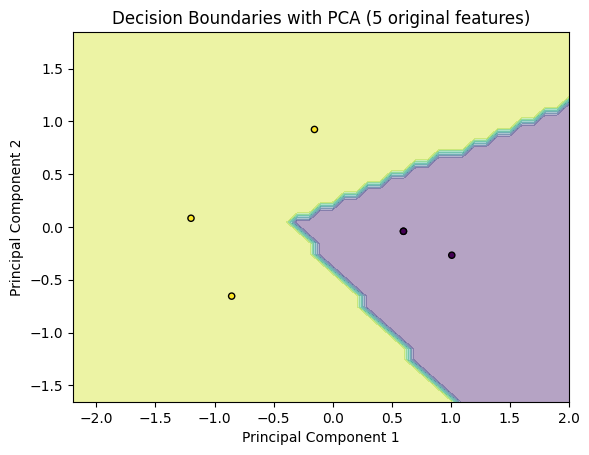

In [7]:
# นำเข้า Library สำหรับวาดต้นไม้
# ส่งโมเดลให้กับ Library สำหรับวาดต้นไม้ (plot_tree)
# ปรับแต่งกราฟที่ได้ให้สวยงาม

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA  # Import PCA

# Assuming features has 5 variables

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)  # Create a PCA object with 2 components
features_pca = pca.fit_transform(features)  # Transform features to 2D

#     Generate a grid of points in the PCA space
#     This is necessary for plot_decision_regions to work
#     with a trained model that expects 5 features.

x_min, x_max = features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1
y_min, y_max = features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Inverse transform the grid points back to the original feature space
#    so the model can make predictions on them

grid_points_original_space = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])

#Get predictions for the grid points
Z = model.predict(grid_points_original_space)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=target, s=20, edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundaries with PCA (5 original features)")
plt.show()



[Text(0.4, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

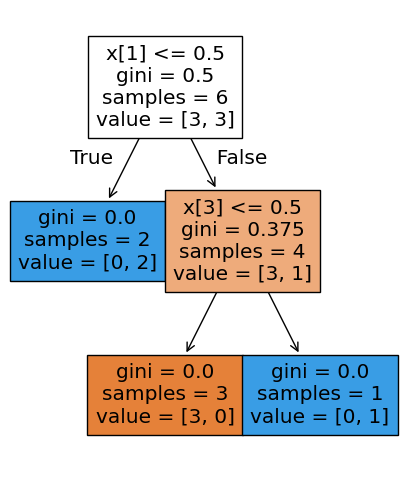

In [8]:
from sklearn import tree

plt.figure(figsize=(5, 6))     # กำหนดขนาดของภาพที่แสดง (5, 6)

tree.plot_tree(model, filled=True)  # แสดง Data Visualization ของ Tree

[Text(0.4, 0.8333333333333334, 'ear <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = dog'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = cat'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'tongue <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = dog'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = dog'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = cat')]

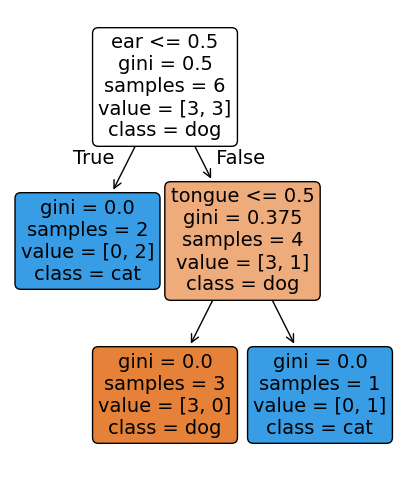

In [9]:
plt.figure(figsize=(5,6))

tree.plot_tree(model, filled=True, feature_names=['face', 'ear', 'brown', 'tongue', 'whisker'], class_names=['dog', 'cat'], rounded=True)

In [10]:
# วาดต้นไม้ในลักษณะที่แสดงเป็นข้อความ (export_text) ที่คนทั่วไปสามารถเข้าใจได้
tree_result = tree.export_text(model)

print(tree_result)

|--- feature_1 <= 0.50
|   |--- class: 1
|--- feature_1 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1



In [11]:
tree_result = tree.export_text(model, feature_names=['face', 'ear', 'brown', 'tongue', 'whisker'], )

print(tree_result)

|--- ear <= 0.50
|   |--- class: 1
|--- ear >  0.50
|   |--- tongue <= 0.50
|   |   |--- class: 0
|   |--- tongue >  0.50
|   |   |--- class: 1



In [12]:
label_encoder.classes_

array(['cat', 'dog'], dtype=object)